In [1]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.request import urlopen
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div class="alert alert-block alert-info">
 <h3>Scraping text from a web page url.</h3>
</div>

In [2]:
def get_text_webpage_urllib(url):
    try: 
        page = urlopen(url)
        html3 = page.read().decode("utf-8")
        # pattern = "<body.*?\s>(.*?)</body>"
        # body = re.findall(pattern, html3, re.DOTALL)
        # Extracting headings and paragraphs
        pattern = "<h[1-6]|p>(.*?)</h[1-6]|p>"
        matches = re.findall(pattern, html3, re.DOTALL)
        return "".join(matches)
    # Catching the exception generated	 
    except Exception as e : 
    	print(str(e))

In [3]:
def get_text_webpage_bs(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    text = soup.get_text()
    return text

In [4]:
# How to Train Your Dragon - Wikipedia
url1 = "https://en.wikipedia.org/wiki/How_to_Train_Your_Dragon"
# Shakespeare's Plays
url2 = "https://www.shakespeare-online.com/plays/"

In [5]:
get_text_webpage_urllib(url1)[:1000], get_text_webpage_bs(url1)[:1000]

('\n<style data-mw-deduplicate="TemplateStyles:r1066479718">.mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infobox-3cols-child{margin:auto}.mw-parser-output .infobox .navbar{font-size:100%}body.skin-minerva .mw-parser-output .infobox-header,body.skin-minerva .mw-parser-output .infobox-subheader,body.skin-minerva .mw-parser-output .infobox-above,body.skin-minerva .mw-parser-output .infobox-title,body.skin-minerva .mw-parser-output .infobox-image,body.skin-minerva .mw-parser-output .infobox-full-data,body.skin-minerva .mw-parser-output .infobox-below{text-align:center}</style><table class="infobox vevent"><tbody><tr><th colspan="2" class="infobox-above summary" style="font-style: italic; background: lavender;">How to Train Your Dragon</th></tr><tr><td colspan="2" class="infobox-image"><span class="mw-default-size" typeof="mw:File/Frameless"><a href="/wiki/Fi

In [6]:
get_text_webpage_urllib(url2)[:1000], get_text_webpage_bs(url2)[:1000]

('',
 "\n\nShakespeare's Plays\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndirectory\n\n\n\n\n\n\nhome\ncontact\n\n\n\n\n\n\n\n\n\n\nwelcome\nplays\nsonnets\nanalysis\nquotations\nsources\nbiography\ntheatres\nkey dates\nplots\nfaq\nbooks\nglossary\nscholars\nquiz\n\n\n\n\nsearch\n\n\n\n\n\n\n\n\n\n\n\xa0\n\n\n\n\n\n\nShakespeare's Plays\r\nBefore the publication of the First Folio in 1623, nineteen of the thirty-seven plays in Shakespeare's canon had appeared in quarto format. With the exception of Othello (1622), all of the quartos were published prior to the date of Shakespeare's retirement from the theatre in about 1611. It is unlikely that Shakespeare was involved directly with the printing of any of his plays, although it should be noted that two of his poems, Venus and Adonis and The Rape of Lucrece were almost certainly printed under his direct supervision. \r\n\r\nHere you will find the complete text of Shakespeare's plays, based primarily on the First Folio, and 

In [7]:
web1, web2 = get_text_webpage_bs(url1), get_text_webpage_bs(url2)

<div class="alert alert-block alert-info">
 <h3><u>Preprocessing:</u></h3>
    <ul>
        <li>Cleaning.</li>        
        <li>Remove stopping words.</li>
        <li>Normalization.</li>
        <li>Tokenization.</li>
        <li>Lemmatization.</li>
        <li>Stemming.</li>
    </ul>
</div>

In [8]:
# Punctuations to be cleaned from our text
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# English stop words with nltk
stop_words = stopwords.words('english')

# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer(language='english')


In [22]:
def preprocess(
    text : str, 
    stemmer_name : str = None
    ) -> list:
    #remove punctuations / cleaning
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # # remove numbers
    # pattern = r"\d"
    # text = re.sub(pattern,'', text)
    # tokenization
    words = nltk.word_tokenize(text)
    # lemmatization
    lemmas = [lemmatizer.lemmatize(word) for word in text.split()]

        #remove English stopping words & Normalization
    text = [word.lower() for word in lemmas if word not in stop_words]
    # #stemming
    match stemmer_name:
        case "porter":
            stemmer = porter_stemmer
        case "lancaster":
            stemmer = lancaster_stemmer
        case "snowball":
            stemmer = snowball_stemmer
        case default:
            stemmer = porter_stemmer
    stems = [stemmer.stem(lemma) for lemma in lemmas]
    return text

In [23]:
processed_web1, processed_web2 = preprocess(web1), preprocess(web2)
" ".join(processed_web1)[2000:3000], " ".join(processed_web2)[2000:3000]

(' dragon disambiguation how train your dragoncreated bycressida cowelloriginal workhow train your dragon 20032015owner dreamworks animationuniversal pictures years2010presentprint publicationsgraphic novel the serpents heir 2017 films televisionfilms how train your dragon 2010 how train your dragon 2 2014 how train your dragon the hidden world 2019 how train your dragon liveaction reboot 2025 short film legend boneknapper dragon 2010 book dragons 2011 gift night fury 2011 dawn dragon racers 2014 how train your dragon homecoming 2019 television series dreamworks dragons 20122018 dreamworks dragons rescue riders 20192022 dreamworks dragons the nine realms 20212023 theatrical presentationsplayshow train your dragon live spectacular 2012gamesvideo game how train your dragon 2010 super star kartz 2011 dragons tapdragondrop 2012 dragons wild skies 2012 school dragons 2013 dragons rise berk 2014 how train your dragon 2 2014 dragons legends nine realms 2022 audiosoundtracks how train your dra

<div class="alert alert-block alert-info">
 <h3>Getting unique words.</h3>
</div>

In [24]:
def get_unique_words(
    words:list
    ) -> list:
    return [*set(words)]

In [25]:
web1_unique_w, web2_unique_w = get_unique_words(processed_web1), get_unique_words(processed_web2)

In [26]:
print(f"Website #1 has number of {len(processed_web1)} words, while it's unique words are {len(web1_unique_w)} words")
print(f"Website #2 has number of {len(processed_web2)} words, while it's unique words are {len(web2_unique_w)} words")

Website #1 has number of 6441 words, while it's unique words are 1909 words
Website #2 has number of 1652 words, while it's unique words are 809 words


In [27]:
pattern = r"\w{3,}\s"
# [re.findall(pattern, " ".join(web2_unique_w))]
# [word  for word in web2_unique_w if len(word)>3]

<div class="alert alert-block alert-info">
 <h3>Comparing different stemmers performance.</h3>
</div>

In [28]:
stemmers = ["porter", "lancaster", "snowball"]
processed_text = list()
for stemmer in stemmers:
    processed_text.append(preprocess(web1, stemmer))

processed_text_lens = list(map(len, processed_text))
unique_words = list(map(get_unique_words, processed_text))
unique_w_lens = list(map(len, unique_words))

In [29]:
processed_text_lens, unique_w_lens

([6441, 6441, 6441], [1909, 1909, 1909])

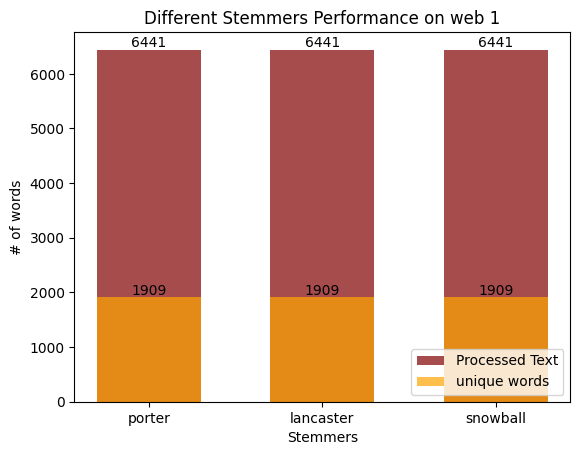

In [30]:
fig, ax = plt.subplots()
bars = ax.bar(stemmers, processed_text_lens, color ='maroon', width = 0.6, alpha=0.7, label = "Processed Text")
ax.bar_label(bars)
bars = ax.bar(stemmers, unique_w_lens, color ='orange', width = 0.6, alpha=0.7, label = "unique words")
ax.bar_label(bars)

plt.xlabel("Stemmers")
plt.ylabel("# of words")
plt.title("Different Stemmers Performance on web 1")
plt.legend(loc='lower right')
plt.show()


In [32]:
processed_text = list()
for stemmer in stemmers:
    processed_text.append(preprocess(web2, stemmer))

processed_text_lens = list(map(len, processed_text))
unique_words = list(map(get_unique_words, processed_text))
unique_w_lens = list(map(len, unique_words))

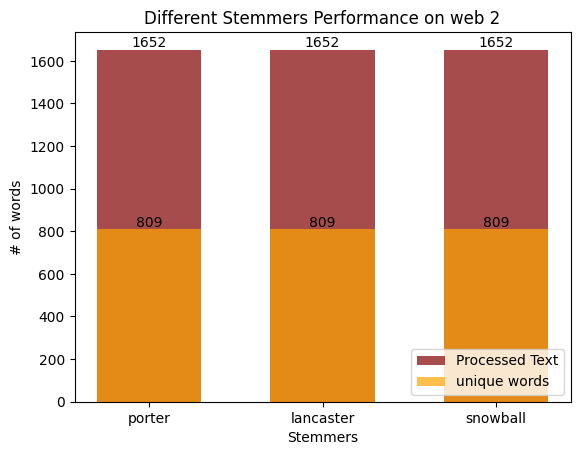

In [33]:
fig, ax = plt.subplots()
bars = ax.bar(stemmers, processed_text_lens, color ='maroon', width = 0.6, alpha=0.7, label = "Processed Text")
ax.bar_label(bars)
bars = ax.bar(stemmers, unique_w_lens, color ='orange', width = 0.6, alpha=0.7, label = "unique words")
ax.bar_label(bars)

plt.xlabel("Stemmers")
plt.ylabel("# of words")
plt.title("Different Stemmers Performance on web 2")
plt.legend(loc='lower right')
plt.show()

In [34]:
# web1_unique_w
pattern = r"\w{,2}\s"
# [re.findall(pattern, " ".join(web2_unique_w))]
[word  for word in web2_unique_w if len(word)<3]

['ii',
 '5',
 '11',
 'a',
 'we',
 'so',
 '13',
 '2',
 'dr',
 'is',
 'mr',
 'ha',
 'no',
 '12',
 'v',
 'wa',
 'q',
 'iv',
 'if',
 'as',
 'he',
 'it',
 '1',
 'vi',
 'z',
 '10',
 'in',
 'i']